<a href="https://colab.research.google.com/github/uday1257/AIML-LAB/blob/main/Assigment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.

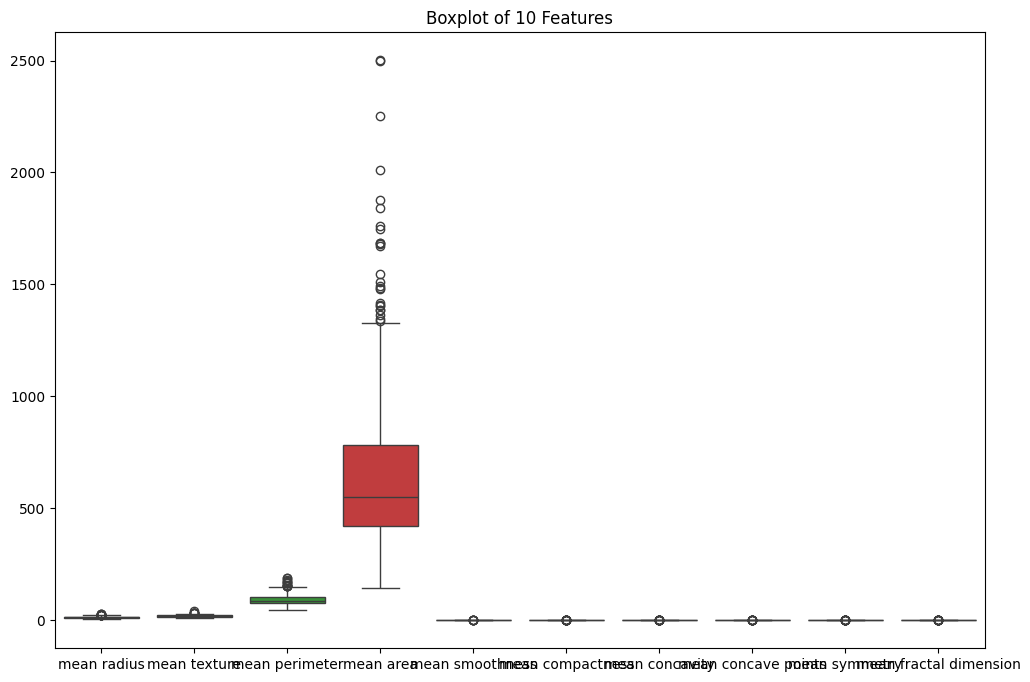

Classification Report:               precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

Confusion Matrix: [[ 61   2]
 [  4 104]]
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf;

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
bcancer = datasets.load_breast_cancer()
print("Features: ", bcancer.feature_names)
print("Labels: ", bcancer.target_names)
df = pd.DataFrame(bcancer.data, columns=bcancer.feature_names)
df['target'] = bcancer.target
print(df.describe())
print(df.isnull().sum())
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.iloc[:, :10])
plt.title('Boxplot of 10 Features')
plt.show()
X = df.drop(columns='target')
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
print("Classification Report:",classification_report(y_test, y_pred))
print("Confusion Matrix:",confusion_matrix(y_test, y_pred))
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']
            }
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)
print(f"Best Parameters: {grid.best_params_}")
y_pred_grid = grid.predict(X_test)
print("Classification Report:",classification_report(y_test, y_pred_grid))
print("Confusion Matrix:",confusion_matrix(y_test, y_pred_grid))